The current weather data can be retrieved from OpenWeatherMap using the Observation module in PyOWM (Python OpenWeatherMap).
Use this documentation for this Mini Project.

1. Get the current weather in Tel Aviv.
2. Get current wind info of Tel Aviv.
3. Get today’s sunrise and sunset times of Tel Aviv.
4. Display all these information in a user friendly way.

5. Recreate these steps, but this time, ask the user for a location (display the information in a user friendly way).
Instead of working with the name of the city, retrieve the id of the city.
Check out the documentation section : “**Identifying cities and places via city IDs**”.

6. Retrieve weather forecasts : The OpenWeatherMap free tier gives you access to 5 day forecasts. The forecasts contain the weather data in three-hour intervals.
- The methods for retrieving the forecast are:
 - forecast_at_place('Los Angeles, US', '3h')
 - forecast_at_id(5391959, '3h')
 - forecast_at_coords(lat=37.774929, lon=-122.419418, interval='3h')
Forecasts are useful if you want to know what the weather conditions will be throughout the day/week.

7. Use this API to retrieve the Air Pollution in a specific city.

**Mini project : XP Ninja**
**BONUS:** Your goal is to produce a weather GUI that shows the three-day humidity forecast for a city of your choice.

If you’ve never built a GUI with Python, don’t worry! We’ll be going through step by step how to build it. We will be using Matplotlib to
plot the weather data. Matplotlib uses Tkinter behind the scenes to display the interactive GUI.

You will have to use :
- the matplotlib module for the bar chart
- the pytz and datetime module for the date
- the pyowm module for the weather


**Instructions:**

1. Start by updating the values for the ylabel and title by creating a function called init_plot().
2. Create a function called plot_temperatures() to determine the details of the bar chart.
3. Create a function called write_humidity_on_bar_chart() to display the % humidity in the bar chart.
4. Style the bar chart

In [1]:
# Installing Required Packages
pip install pyowm matplotlib pytz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.5 MB/s eta 0:00:00


In [3]:
from pyowm.owm import OWM
from pyowm.utils.config import get_default_config

API_KEY = 'a9be9036285887a8815157bf07ba1d90'

config_dict = get_default_config()
config_dict['language'] = 'en'

owm = OWM(API_KEY, config_dict)
mgr = owm.weather_manager()

In [10]:
# Get Weather and Forecast Info
def get_weather_info(city_name):
    observation = mgr.weather_at_place(city_name)
    weather = observation.weather
    wind = weather.wind()
    sunrise = weather.sunrise_time(timeformat='iso')
    sunset = weather.sunset_time(timeformat='iso')
    status = weather.detailed_status
    temp = weather.temperature('celsius')["temp"]

    return {
        "status": status,
        "temperature": temp,
        "wind": wind,
        "sunrise": sunrise,
        "sunset": sunset
    }

def get_humidity_forecast(city_name):
  forecast = mgr.forecast_at_place(city_name, '3h')
  weather_list = forecast.forecast.weathers

  # Keep only next 3 days of humidity
  from datetime import datetime, timedelta
  now = datetime.now()
  three_days_later = now + timedelta(days=3)

  humidity_data = {}
  for w in weather_list:
    if now <= w.reference_time('date') <= three_days_later:
      date = w.reference_time('date').date()
      if date not in humidity_data:
        humidity_data[date] = []
      humidity_data[date].append(w.humidity)

    # Average Humidity per Day
    average_humidity = {date: round(sum(values)/len(values)) for date, values in humidity_data.items()}
    return average_humidity

In [11]:
# Creating and Styling the Bar Chart
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def init_plot():
  plt.ylabel ("Humidity (%)")
  plt.title ("3-Day Humidity Forecast")

def plot_humidity_chart (humidity_data):
  dates = list(humidity_data.keys())
  humidities = list(humidity_data.values())

  bars = plt.bar(dates, humidities, color='skyblue', edgecolor='black')
  write_humidity_on_bar_chart(bars, humidities)

  plt.ylim(0, 100)
  plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
  plt.tight_layout()
  plt.show()

def write_humidity_on_bar_chart(bars, humidities):
  for bar, humidity in zip(bars, humidities):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{humidity}%', ha='center', fontsize=10)

Enter a city: Nairobi

Weather in Nairobi
Status: Overcast clouds
Temperature: 16.78°C
Wind: {'speed': 2.37, 'deg': 130, 'gust': 3.75}
Sunrise: 2025-06-28 03:34:28+00:00
Sunset: 2025-06-28 15:37:17+00:00


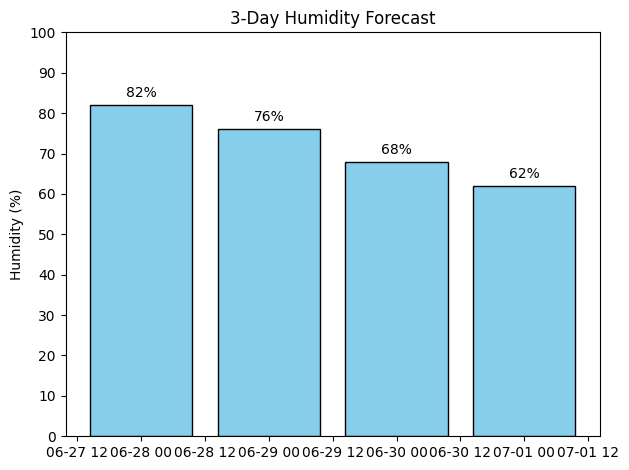

In [13]:
city = input("Enter a city: ")
weather_info = get_weather_info(city)
humidity_data = get_humidity_forecast(city)

print(f"\nWeather in {city.title()}")
print(f"Status: {weather_info['status'].capitalize()}")
print(f"Temperature: {weather_info['temperature']}°C")
print(f"Wind: {weather_info['wind']}")
print(f"Sunrise: {weather_info['sunrise']}")
print(f"Sunset: {weather_info['sunset']}")

init_plot()
plot_humidity_chart(humidity_data)

In [16]:
# Get city ID
from pyowm.commons.cityidregistry import CityIDRegistry
registry = owm.city_id_registry()
ids = registry.ids_for('Tel Aviv', country='IL')
print(ids)

forecast = mgr.forecast_at_id(ids[0][0], '3h')

[(293396, 'Tel Aviv District', 'IL', None, 32.083328, 34.799999), (293397, 'Tel Aviv', 'IL', None, 32.080879, 34.780571)]
